# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     973.1
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.33e-41
Time:                        21:36:11   Log-Likelihood:                 1.9987
No. Observations:                  50   AIC:                             4.003
Df Residuals:                      46   BIC:                             11.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9686      0.083     60.142      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.44383812  4.93554129  5.38714405  5.77097967  6.06936619  6.27751152
  6.40430078  6.47083651  6.50697154  6.5464043   6.62114225  6.75624311
  6.96569801  7.25013274  7.59670494  7.98121409  8.37207755  8.73551954
  9.04112036  9.26681429  9.40251492  9.45177233  9.43118978  9.36769589
  9.29412033  9.24379997  9.24510177  9.31676213  9.46480858  9.68156947
  9.94693438 10.23165823 10.50216615 10.72606973 10.87748838 10.94130138
 10.91563222 10.81215688 10.65418552 10.47283267 10.30190519 10.17234793
 10.10715955 10.11761394 10.2014079  10.3430396  10.51635546 10.6888471
 10.82699242 10.90176312]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.87904029 10.72192384 10.45032206 10.10960347  9.75948899  9.45943017
  9.25405341  9.16223384  9.17247403  9.24571895]


## Plot comparison

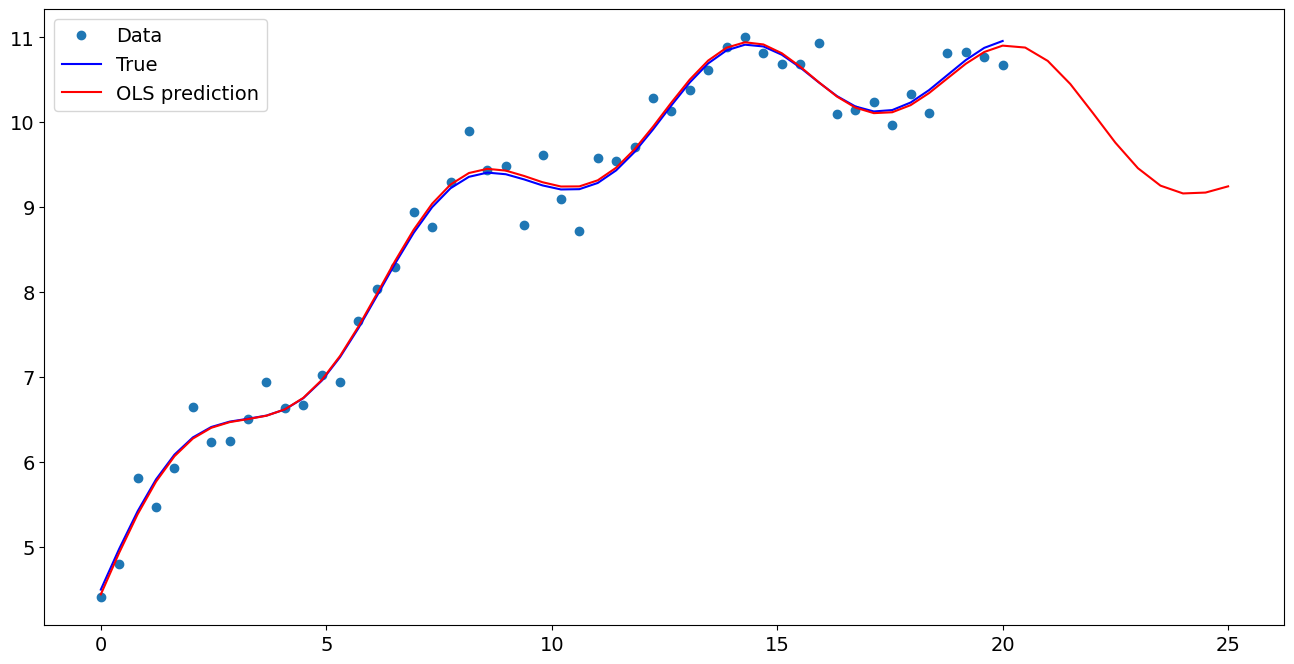

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.968640
x1                  0.509644
np.sin(x1)          0.507655
I((x1 - 5) ** 2)   -0.020992
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.879040
1    10.721924
2    10.450322
3    10.109603
4     9.759489
5     9.459430
6     9.254053
7     9.162234
8     9.172474
9     9.245719
dtype: float64